<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/MCSO/notebooks/05_Validaci%C3%B3nModeloIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Validación del modelo en el conjunto de datos Iris

Vamos a construir, compilar y entrenar un modelo de red neuronal con el conjunto de datos Iris. 
Comprobaremos qué pasa cuando hay overfitting o sobreentrenamiento

Además, usaremos la validación, regularización y callback mejorar el modelo.



In [ ]:
from numpy.random import seed
seed(8)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
%matplotlib inline




####  1 - Obtención y preparación de datos para entrenar

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [ ]:

def read_in_and_split_data(iris_data):

    data = iris_data['data']
    targets = iris_data['target']
    
    train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)  # utilizamos la función para dividir el conjunto de datos training y test
    
    return (train_data, test_data, train_targets, test_targets)
    
    

In [ ]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [ ]:
iris_data.data.shape

(150, 4)

In [ ]:
iris_data.data[0]

array([5.1, 3.5, 1.4, 0.2])

We will now convert the training and test targets using a one hot encoder.

In [ ]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [ ]:
print(train_data.shape)

(135, 4)


#### 2 - Definición del modelo. Construir el modelo de red neuronal

You can now construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* The first layer should be a dense layer with 64 units.
* The weights of the first layer should be initialised with the He uniform initializer.
* The biases of the first layer should be all initially equal to one.
* There should then be a further four dense layers, each with 128 units.
* This should be followed with four dense layers, each with 64 units.
* All of these Dense layers should use the ReLU activation function.
* The output Dense layer should have 3 units and the softmax activation function.

In total, the network should have 10 layers.

In [ ]:

def get_model(input_shape):

    model = Sequential([
                      Dense(64, activation='relu', kernel_initializer='he_uniform', bias_initializer='ones', input_shape=input_shape),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(64, activation='relu'),
                      Dense(64, activation='relu'),
                      Dense(64, activation='relu'),
                      Dense(64, activation='relu'),
                      Dense(3, activation='softmax')
    ])
    
    return model
    
    

In [ ]:

model = get_model(train_data[0].shape)

Vemos que tenemos un modelo bastante completo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

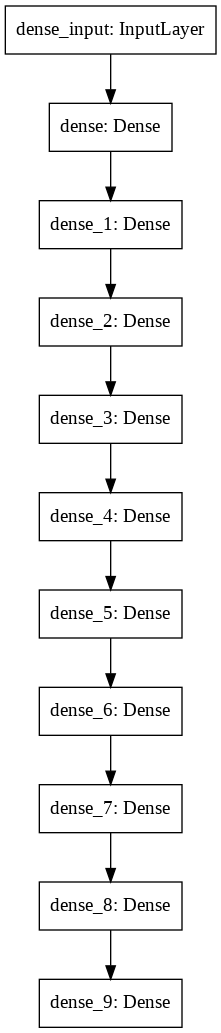

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=False)  # probad con True

#### 3 - Configuración del proceso de aprendizaje. Compilar el modelo

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:

def compile_model(model):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    

In [ ]:

compile_model(model)

#### 4 - Entrenamiento del modelo

Now you should train the model on the Iris dataset, using the model's `fit` method. 
* Run the training for a fixed number of epochs, given by the function's `epochs` argument.
* Return the training history to be used for plotting the learning curves.
* Set the batch size to 64.
* Set the validation set to be 15% of the training set.

Tenemos muchos argumentos como validation

In [ ]:

def train_model(model, train_data, train_targets, epochs):
    
    history = model.fit(train_data, train_targets, epochs = epochs, validation_split=0.10, batch_size=64)
    
    return history
    

Run the following cell to run the training for 800 epochs.

Normalmente guardamos las variables cuando vamos a mostrar la figura Plot

In [ ]:

history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
2/2 [==============================] - 2s 623ms/step - loss: 1.0958 - accuracy: 0.3301 - val_loss: 1.0559 - val_accuracy: 0.3571
Epoch 2/800
2/2 [==============================] - 0s 63ms/step - loss: 1.0720 - accuracy: 0.3405 - val_loss: 1.0446 - val_accuracy: 0.3571
Epoch 3/800
2/2 [==============================] - 0s 61ms/step - loss: 1.0528 - accuracy: 0.3509 - val_loss: 1.0309 - val_accuracy: 0.4286
Epoch 4/800
2/2 [==============================] - 0s 60ms/step - loss: 1.0333 - accuracy: 0.4923 - val_loss: 1.0126 - val_accuracy: 0.5000
Epoch 5/800
2/2 [==============================] - 0s 81ms/step - loss: 1.0157 - accuracy: 0.6807 - val_loss: 0.9983 - val_accuracy: 0.5000
Epoch 6/800
2/2 [==============================] - 0s 64ms/step - loss: 0.9987 - accuracy: 0.6865 - val_loss: 0.9837 - val_accuracy: 0.5000
Epoch 7/800
2/2 [==============================] - 0s 68ms/step - loss: 0.9809 - accuracy: 0.7177 - val_loss: 0.9693 - val_accuracy: 0.5000
Epoch 8/800
2/2 [==

#### a) Representar las curvas de aprendizaje

Representaremos las dos gráficas:
* Epoch vs accuracy
* Epoch vs loss


Escribimos otra numeración a partir de aquí a, b, ... porque con los 4 pasos anteriores ya se crea el modelo

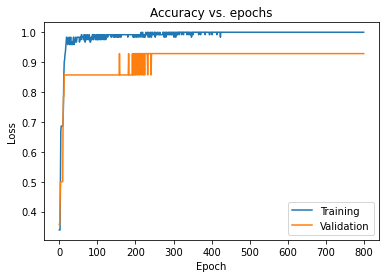

In [ ]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

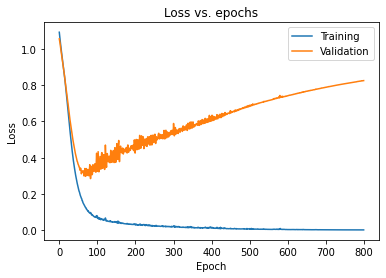

In [ ]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

Esto se observa cuando hay una diferencia demasiado grande entre estas dos curvas de aprendizaje y validación, sólo aprende los ejemplos y no generaliza

#### b) Reducir el sobreentrenado (overfitting) el modelo

You should now define a new **regularised** model.
The specs for the regularised model are the same as our original model, with the addition of **two dropout layers, weight decay, and a batch normalisation layer. **

Básicamente lo que permite es que se vaya aprendiendo mejor y que los errores y el loss lo regularice, vea el resultado anterior y regularice.

In particular:

* Add a dropout layer after the 3rd Dense layer
* Then there should be two more Dense layers with 128 units before a batch normalisation layer
* Following this, two more Dense layers with 64 units and then another Dropout layer
* Two more Dense layers with 64 units and then the final 3-way softmax layer
* Add weight decay (l2 kernel regularisation) in all Dense layers except the final softmax layer

In [ ]:

def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay), kernel_initializer='he_uniform', bias_initializer='ones', input_shape=input_shape),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dropout(dropout_rate),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(128, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      BatchNormalization(),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dropout(dropout_rate),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(64, activation='relu', kernel_regularizer = regularizers.l2(weight_decay)),
                      Dense(3, activation='softmax')
    ])
    
    return model
    
    

####c) Llamar al modelo, compilarlo y entrenarlo

In [ ]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [ ]:
# Compile the model

compile_model(reg_model)

In [ ]:
# podemos volver a mostrar el nuevo modelo
reg_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [ ]:
# Volvemos a entrenar el nuevo modelo, en este caso hacemos que lo entrene por completo


reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
2/2 [==============================] - 1s 353ms/step - loss: 1.9791 - accuracy: 0.3518 - val_loss: 1.9137 - val_accuracy: 0.5000
Epoch 2/800
2/2 [==============================] - 0s 67ms/step - loss: 1.9512 - accuracy: 0.3781 - val_loss: 1.9066 - val_accuracy: 0.5000
Epoch 3/800
2/2 [==============================] - 0s 62ms/step - loss: 1.9603 - accuracy: 0.4329 - val_loss: 1.8992 - val_accuracy: 0.5000
Epoch 4/800
2/2 [==============================] - 0s 61ms/step - loss: 1.9441 - accuracy: 0.3729 - val_loss: 1.8907 - val_accuracy: 0.5000
Epoch 5/800
2/2 [==============================] - 0s 65ms/step - loss: 1.9139 - accuracy: 0.4106 - val_loss: 1.8827 - val_accuracy: 0.5000
Epoch 6/800
2/2 [==============================] - 0s 61ms/step - loss: 1.9581 - accuracy: 0.3784 - val_loss: 1.8751 - val_accuracy: 0.5000
Epoch 7/800
2/2 [==============================] - 0s 64ms/step - loss: 1.8652 - accuracy: 0.5943 - val_loss: 1.8684 - val_accuracy: 0.5000
Epoch 8/800
2/2 [==

Vemos que se ha hecho con una precisión muy alta, así que tendremos buenas curvas

Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

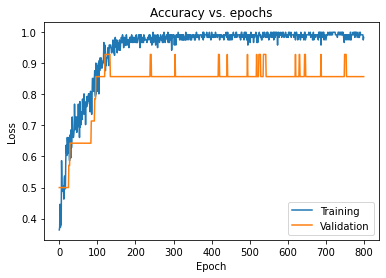

In [ ]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

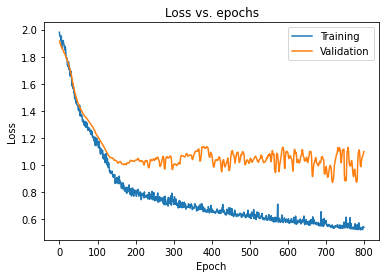

In [ ]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
# Evaluate the model on the test set

test_loss, test_acc = reg_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.514
Test accuracy: 100.00%


#### Parar el modelo

**Importante:**

Vemos que la regularización ha ayudado a reducir el sobreajuste de la red.
Ahora incorporaremos `callbacks`  en una nueva ejecución de entrenamiento que implementa `EarlyStopping` (parada temprana) y la `ReduceLROnPlateau` (reducción de la tasa de aprendizaje en las mesetas).

**Indicaciones:**
* It creates an `EarlyStopping` callback object and a `ReduceLROnPlateau` callback object
* The early stopping callback is used and monitors validation loss with the mode set to `"min"` and patience of 30.
* The learning rate reduction on plateaux is used with a learning rate factor of 0.2 and a patience of 20.

**Importante:**

Fijaros que aquí es muy importante donde definimos la función callback

Esto combinado con las opciones de grabar los modelos es lo que hace muy potente nuestro modelado. Lo veremos en los modelos completos

In [ ]:

def get_callbacks():

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode='min')
    lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(patience=16, factor=0.2)
    
    return early_stopping, lr_reduce

Run the cell below to instantiate and train the regularised model with the callbacks.

In [ ]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.10,
                         callbacks=[early_stopping, learning_rate_reduction])

Epoch 1/800
4/4 [==============================] - 1s 103ms/step - loss: 1.2618 - accuracy: 0.3513 - val_loss: 1.1608 - val_accuracy: 0.3571
Epoch 2/800
4/4 [==============================] - 0s 16ms/step - loss: 1.2353 - accuracy: 0.3642 - val_loss: 1.1308 - val_accuracy: 0.3571
Epoch 3/800
4/4 [==============================] - 0s 19ms/step - loss: 1.2624 - accuracy: 0.3018 - val_loss: 1.1079 - val_accuracy: 0.3571
Epoch 4/800
4/4 [==============================] - 0s 16ms/step - loss: 1.2054 - accuracy: 0.3347 - val_loss: 1.0937 - val_accuracy: 0.5000
Epoch 5/800
4/4 [==============================] - 0s 19ms/step - loss: 1.2049 - accuracy: 0.3498 - val_loss: 1.0806 - val_accuracy: 0.5000
Epoch 6/800
4/4 [==============================] - 0s 18ms/step - loss: 1.1094 - accuracy: 0.4335 - val_loss: 1.0706 - val_accuracy: 0.5000
Epoch 7/800
4/4 [==============================] - 0s 17ms/step - loss: 1.1750 - accuracy: 0.3913 - val_loss: 1.0617 - val_accuracy: 0.5000
Epoch 8/800
4/4 [==

In [ ]:
learning_rate_reduction.patience

16

Finally, let's replot the accuracy and loss graphs for our new model.

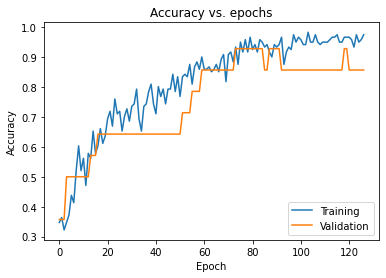

In [ ]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

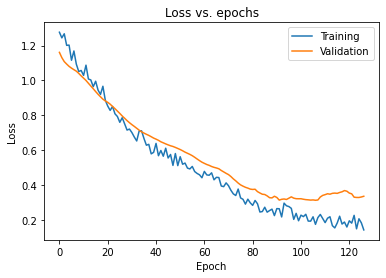

In [ ]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.219
Test accuracy: 93.33%


Se puede ver en la figura como sí que se obtiene una aproximación muy grande entre el entrenamiento y la validación, no siempre es el caso pero ahí se dice que el modelo ha funcionado, se ha configurado bien, ...